In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [2]:
housing = fetch_california_housing()

In [3]:
X, y = housing.data, housing.target
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, random_state=7)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_all, y_train_all, random_state=11)

In [4]:
stand_scale = StandardScaler()

x_train_scale = stand_scale.fit_transform(X_train)
x_valid_scale = stand_scale.transform(X_valid)
x_test_scale = stand_scale.transform(X_test)

In [5]:
print(x_train_scale.shape, y_train.shape)
print(x_valid_scale.shape, y_test.shape)
print(x_test_scale.shape, y_valid.shape)

(11610, 8) (11610,)
(3870, 8) (5160,)
(5160, 8) (3870,)


In [6]:
# RandomsizedSearchCV
# 定义sklean模型的model
# 定义参数集合
# 搜索参数

def build_model(hidden_layer=1, 
                layer_size=30, 
                learning_rate=1e-3):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(layer_size, activation="relu", input_shape=x_train_scale.shape[1:]))
    
    for _ in range(hidden_layer -1):
        model.add(keras.layers.Dense(layer_size, activation="relu"))
    
    model.add(keras.layers.Dense(1))
    
    optimizer = keras.optimizers.SGD(learning_rate)    
    model.compile(loss="mse", optimizer=optimizer)
    
    return model

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]
sklearn_model = KerasRegressor(build_fn=build_model)

history = sklearn_model.fit(x_train_scale, y_train, 
                    validation_data=(x_valid_scale, y_valid), 
                    epochs=20, 
                    callbacks=callbacks)

Epoch 1/20
363/363 [==============================] - 0s 874us/step - loss: 2.1442 - val_loss: 1.0266
Epoch 2/20
363/363 [==============================] - 0s 611us/step - loss: 0.8426 - val_loss: 0.8577
Epoch 3/20
363/363 [==============================] - 0s 642us/step - loss: 0.7609 - val_loss: 0.7992
Epoch 4/20
363/363 [==============================] - 0s 601us/step - loss: 0.7176 - val_loss: 0.7590
Epoch 5/20
363/363 [==============================] - 0s 643us/step - loss: 0.6843 - val_loss: 0.7261
Epoch 6/20
363/363 [==============================] - 0s 600us/step - loss: 0.6547 - val_loss: 0.6972
Epoch 7/20
363/363 [==============================] - 0s 597us/step - loss: 0.6281 - val_loss: 0.6682
Epoch 8/20
363/363 [==============================] - 0s 600us/step - loss: 0.6052 - val_loss: 0.6438
Epoch 9/20
363/363 [==============================] - 0s 601us/step - loss: 0.5834 - val_loss: 0.6189
Epoch 10/20
363/363 [==============================] - 0s 639us/step - loss: 0.565

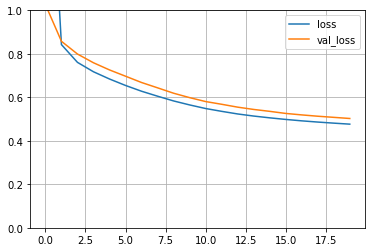

In [7]:
def plt_learning_curve(history):
    pd.DataFrame(history).plot(figsize=(6,4))
    plt.grid(True)
    plt.ylim(0, 1)
    plt.show()
    
plt_learning_curve(history.history)

In [11]:
param_distributions = {
    "hidden_layer": np.arange(1, 5),
    "layer_size": np.arange(20, 40),
    "learning_rate": [1e-4, 3*1e-4, 1e-3, 3*1e-3, 1e-2, 3*1e-2]
}

from sklearn.model_selection import RandomizedSearchCV

random_search_cv = RandomizedSearchCV(estimator=sklearn_model,
                                      param_distributions=param_distributions,
                                      n_iter=10,
                                      n_jobs=1)

In [12]:
random_search_cv.fit(x_train_scale, y_train, 
                     epochs = 10,
                     validation_data=(x_valid_scale, y_valid), 
                     callbacks=callbacks)

#cross_validation:训练集分成n份，n-1份训练，最后一份验证

Epoch 1/10
291/291 [==============================] - 0s 1ms/step - loss: 3.3858 - val_loss: 2.3455
Epoch 2/10
291/291 [==============================] - 0s 820us/step - loss: 1.8668 - val_loss: 1.6750
Epoch 3/10
291/291 [==============================] - 0s 855us/step - loss: 1.4273 - val_loss: 1.3600
Epoch 4/10
291/291 [==============================] - 0s 858us/step - loss: 1.1761 - val_loss: 1.1393
Epoch 5/10
291/291 [==============================] - 0s 860us/step - loss: 0.9953 - val_loss: 0.9811
Epoch 6/10
291/291 [==============================] - 0s 840us/step - loss: 0.8664 - val_loss: 0.8657
Epoch 7/10
291/291 [==============================] - 0s 859us/step - loss: 0.7757 - val_loss: 0.7875
Epoch 8/10
291/291 [==============================] - 0s 859us/step - loss: 0.7136 - val_loss: 0.7327
Epoch 9/10
291/291 [==============================] - 0s 859us/step - loss: 0.6701 - val_loss: 0.6941
Epoch 10/10
73/73 [==============================] - 0s 520us/step - loss: 0.5889
Ep

291/291 [==============================] - 0s 676us/step - loss: 0.4802 - val_loss: 0.5838
Epoch 3/10
291/291 [==============================] - 0s 794us/step - loss: 0.6934 - val_loss: 1.0613
Epoch 4/10
291/291 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 5/10
291/291 [==============================] - 0s 637us/step - loss: nan - val_loss: nan
Epoch 6/10
73/73 [==============================] - 0s 451us/step - loss: nan
Epoch 1/10
291/291 [==============================] - 0s 848us/step - loss: nan - val_loss: nan
Epoch 2/10
291/291 [==============================] - 0s 731us/step - loss: nan - val_loss: nan
Epoch 3/10
291/291 [==============================] - 0s 594us/step - loss: nan - val_loss: nan
Epoch 4/10
291/291 [==============================] - 0s 632us/step - loss: nan - val_loss: nan
Epoch 5/10
73/73 [==============================] - 0s 465us/step - loss: nan
Epoch 1/10
291/291 [==============================] - 0s 1ms/step - loss: 3.6

291/291 [==============================] - 0s 1ms/step - loss: 0.3802 - val_loss: 0.3893
Epoch 7/10
291/291 [==============================] - 0s 1ms/step - loss: 0.3706 - val_loss: 0.4025
Epoch 8/10
291/291 [==============================] - 0s 1ms/step - loss: 0.3658 - val_loss: 0.3831
Epoch 9/10
291/291 [==============================] - 0s 1ms/step - loss: 0.3571 - val_loss: 0.3660
Epoch 10/10
73/73 [==============================] - 0s 731us/step - loss: 0.3520
Epoch 1/10
291/291 [==============================] - 0s 1ms/step - loss: 0.8053 - val_loss: 0.5053
Epoch 2/10
291/291 [==============================] - 0s 875us/step - loss: 0.4446 - val_loss: 0.4526
Epoch 3/10
291/291 [==============================] - 0s 859us/step - loss: 0.4073 - val_loss: 0.4153
Epoch 4/10
291/291 [==============================] - 0s 855us/step - loss: 0.3897 - val_loss: 0.3956
Epoch 5/10
291/291 [==============================] - 0s 809us/step - loss: 0.3797 - val_loss: 0.3935
Epoch 6/10
291/291 [=

291/291 [==============================] - 0s 859us/step - loss: 0.7007 - val_loss: 0.7187
Epoch 10/10
73/73 [==============================] - 0s 533us/step - loss: 0.6637
Epoch 1/10
291/291 [==============================] - 0s 1ms/step - loss: 3.7415 - val_loss: 2.4038
Epoch 2/10
291/291 [==============================] - 0s 792us/step - loss: 1.7601 - val_loss: 1.4555
Epoch 3/10
291/291 [==============================] - 0s 859us/step - loss: 1.2783 - val_loss: 1.1824
Epoch 4/10
291/291 [==============================] - 0s 859us/step - loss: 1.0757 - val_loss: 1.0318
Epoch 5/10
291/291 [==============================] - 0s 911us/step - loss: 0.9372 - val_loss: 0.9232
Epoch 6/10
291/291 [==============================] - 0s 966us/step - loss: 0.8302 - val_loss: 0.8376
Epoch 7/10
291/291 [==============================] - 0s 851us/step - loss: 0.7550 - val_loss: 0.7779
Epoch 8/10
291/291 [==============================] - 0s 896us/step - loss: 0.7014 - val_loss: 0.7295
Epoch 9/10
29

Epoch 4/10
291/291 [==============================] - 0s 856us/step - loss: 0.4102 - val_loss: 0.5490
Epoch 5/10
291/291 [==============================] - 0s 805us/step - loss: 0.3951 - val_loss: 0.4182
Epoch 6/10
291/291 [==============================] - 0s 856us/step - loss: 0.3829 - val_loss: 0.4167
Epoch 7/10
291/291 [==============================] - 0s 859us/step - loss: 0.3736 - val_loss: 0.4540
Epoch 8/10
291/291 [==============================] - 0s 859us/step - loss: 0.3636 - val_loss: 0.3757
Epoch 9/10
291/291 [==============================] - 0s 805us/step - loss: 0.3573 - val_loss: 0.3817
Epoch 10/10
73/73 [==============================] - 0s 522us/step - loss: 0.4133
Epoch 1/10
291/291 [==============================] - 0s 1ms/step - loss: 1.3616 - val_loss: 0.5611
Epoch 2/10
291/291 [==============================] - 0s 820us/step - loss: 0.4641 - val_loss: 0.4614
Epoch 3/10
291/291 [==============================] - 0s 783us/step - loss: 0.4104 - val_loss: 0.4159
Ep

291/291 [==============================] - ETA: 0s - loss: 0.420 - 0s 794us/step - loss: 0.4238 - val_loss: 0.4565
Epoch 10/10
73/73 [==============================] - 0s 538us/step - loss: 0.4399
Epoch 1/10
291/291 [==============================] - 0s 1ms/step - loss: 1.4504 - val_loss: 0.7182
Epoch 2/10
291/291 [==============================] - 0s 927us/step - loss: 0.6190 - val_loss: 0.6352
Epoch 3/10
291/291 [==============================] - 0s 869us/step - loss: 0.5659 - val_loss: 0.5939
Epoch 4/10
291/291 [==============================] - 0s 807us/step - loss: 0.5301 - val_loss: 0.5521
Epoch 5/10
291/291 [==============================] - 0s 854us/step - loss: 0.5002 - val_loss: 0.5200
Epoch 6/10
291/291 [==============================] - 0s 858us/step - loss: 0.4759 - val_loss: 0.5018
Epoch 7/10
291/291 [==============================] - 0s 859us/step - loss: 0.4541 - val_loss: 0.4725
Epoch 8/10
291/291 [==============================] - 0s 859us/step - loss: 0.4395 - val_lo

291/291 [==============================] - 0s 1ms/step - loss: 2.4513 - val_loss: 1.1785
Epoch 2/10
291/291 [==============================] - 0s 766us/step - loss: 0.8975 - val_loss: 0.8012
Epoch 3/10
291/291 [==============================] - 0s 802us/step - loss: 0.6853 - val_loss: 0.6781
Epoch 4/10
291/291 [==============================] - 0s 859us/step - loss: 0.6172 - val_loss: 0.6333
Epoch 5/10
291/291 [==============================] - 0s 858us/step - loss: 0.5858 - val_loss: 0.6017
Epoch 6/10
291/291 [==============================] - 0s 857us/step - loss: 0.5621 - val_loss: 0.5780
Epoch 7/10
291/291 [==============================] - 0s 811us/step - loss: 0.5431 - val_loss: 0.5595
Epoch 8/10
291/291 [==============================] - 0s 855us/step - loss: 0.5269 - val_loss: 0.5437
Epoch 9/10
291/291 [==============================] - 0s 856us/step - loss: 0.5126 - val_loss: 0.5292
Epoch 10/10
73/73 [==============================] - 0s 546us/step - loss: 0.4933
Epoch 1/10
29

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x0000019BB3BA3A00>, as the constructor either does not set or modifies parameter layer_size

In [10]:
print(random_search_cv.best_params_)
print(random_search_cv.best_score_)

{'learning_rate': 0.01, 'layer_size': 24, 'hidden_layer': 3}
-0.36727604269981384


In [ ]:
estimator = random_search_cv.estimator

In [ ]:
estimator.score(x_test_scale, y_test)

In [ ]:
RandomizedSearchCV?

In [ ]:
np.arange(20, 40)